In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import make_blobs
import random
import itertools
import matplotlib.pyplot as plt

## task 04


Задание 4: Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [2]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [3]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [4]:
def inner_dist(centroids, clusters):
    inner_dist = np.array([1 / len(clusters[key]) * np.array([e_metrics(x, centroids[key]) ** 2 for x in clusters[key]]).sum() for key in clusters.keys()]).sum()
    
    return inner_dist

In [5]:
def outer_dist(clusters):
    outer_dist = 0
    for k in clusters.keys():
        for x in clusters[k]:
            dist = [e_metrics(x, itm) ** 2 for itm in itertools.chain.from_iterable([clusters[j] for j in clusters.keys() if j != k])]
        outer_dist += np.array(dist).sum()
        
    return 1 / len(clusters.keys()) * outer_dist

In [6]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [7]:
X, y = make_blobs(n_samples=100, random_state=1)

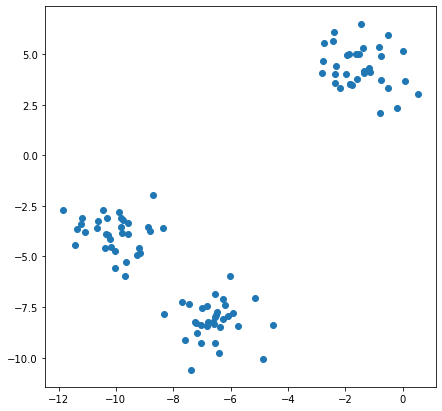

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [9]:
max_iterations = 10
min_distance = 1e-4

In [10]:
centroids, clusters = kmeans(X, 3, max_iterations, min_distance)

In [11]:
# inner_dist(centroids, clusters), outer_dist(clusters)

In [12]:
dist = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    dist.append(inner_dist(centroids, clusters))

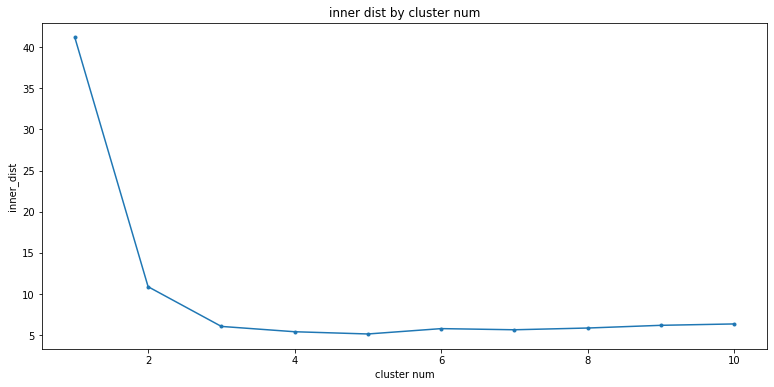

In [13]:
plt.figure(figsize=(13, 6))
plt.title('inner dist by cluster num')
plt.xlabel('cluster num')
plt.ylabel('inner_dist')

plt.plot(range(1, 11), dist, marker = '.')


plt.show()

Оптимальное значение количества кластеров 3